# Fruit Image Classification - Deep Learning 

The data is from [Kaggle](https://www.kaggle.com/datasets/moltean/fruits) contains nine classes of fruit and a variety of training, testing, and validation images of each class of fruit. The main objective of the analysis is to train image classifiers to recognize and predict certain types of fruits. Two CNNs will be made from sequential models in Keras while the other will be using the VGG16 prebuilt model with a few added layers.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

## Load Data

In [2]:
train_dir = (r'C:\Users\John Yannone\Downloads\FruitData\fruits-360-original-size\Training')
test_dir = (r'C:\Users\John Yannone\Downloads\FruitData\fruits-360-original-size\Test')
valid_dir = (r'C:\Users\John Yannone\Downloads\FruitData\fruits-360-original-size\Validation')

IMG_SIZE = (224, 224)
train_images = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=IMG_SIZE,batch_size=10,shuffle=False)
test_images = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMG_SIZE,batch_size=10,shuffle=False)
valid_images =  tf.keras.preprocessing.image_dataset_from_directory(directory=valid_dir,image_size=IMG_SIZE,batch_size=10,shuffle=False)

Found 1887 files belonging to 9 classes.
Found 937 files belonging to 9 classes.
Found 939 files belonging to 9 classes.


## Model 1

In [3]:
model_1 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(224, 224 , 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(9, 'softmax')
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [4]:
model_1.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [5]:
history_1 = model_1.fit(train_images,
                              epochs=5,
                              steps_per_epoch=len(train_images),
                              validation_data=valid_images)

Epoch 1/5
189/189 [==============================] - 33s 174ms/step - loss: 224.6329 - sparse_categorical_accuracy: 0.6831 - val_loss: 17.5164 - val_sparse_categorical_accuracy: 0.3419
Epoch 2/5
189/189 [==============================] - 32s 171ms/step - loss: 2.8573 - sparse_categorical_accuracy: 0.7896 - val_loss: 12.8245 - val_sparse_categorical_accuracy: 0.4505
Epoch 3/5
189/189 [==============================] - 32s 171ms/step - loss: 1.3824 - sparse_categorical_accuracy: 0.8829 - val_loss: 4.5898 - val_sparse_categorical_accuracy: 0.5463
Epoch 4/5
189/189 [==============================] - 32s 172ms/step - loss: 0.3048 - sparse_categorical_accuracy: 0.9433 - val_loss: 3.3193 - val_sparse_categorical_accuracy: 0.5974
Epoch 5/5
189/189 [==============================] - 32s 171ms/step - loss: 0.1692 - sparse_categorical_accuracy: 0.9618 - val_loss: 0.1283 - val_sparse_categorical_accuracy: 0.9606


In [6]:
loss_1, test_accuracy_1 = model_1.evaluate(test_images)

print(f'The loss on the test set is {(loss_1):,.3f}')
print(f'The accuracy on the test set: {(test_accuracy_1):.3%}')

94/94 [==============================] - 2s 26ms/step - loss: 0.1172 - sparse_categorical_accuracy: 0.9669
The loss on the test set is 0.117
The accuracy on the test set: 96.692%


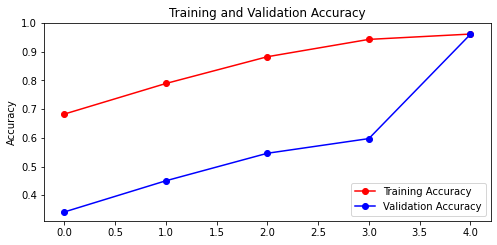

In [7]:
acc = history_1.history['sparse_categorical_accuracy']
val_acc = history_1.history['val_sparse_categorical_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', marker='o', color="red")
plt.plot(val_acc, label='Validation Accuracy', marker='o', color="blue",)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy');

## Model 2

In [8]:
model_2 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(224, 224 , 3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='sigmoid'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(9, 'softmax')
])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [9]:
model_2.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [10]:
history_2 = model_2.fit(train_images,
                              epochs=5,
                              steps_per_epoch=len(train_images),
                              validation_data=valid_images)

Epoch 1/5
189/189 [==============================] - 79s 419ms/step - loss: 37.8712 - sparse_categorical_accuracy: 0.6301 - val_loss: 16.3843 - val_sparse_categorical_accuracy: 0.0532
Epoch 2/5
189/189 [==============================] - 79s 417ms/step - loss: 6.5066 - sparse_categorical_accuracy: 0.6412 - val_loss: 13.2115 - val_sparse_categorical_accuracy: 0.1725
Epoch 3/5
189/189 [==============================] - 79s 418ms/step - loss: 5.3878 - sparse_categorical_accuracy: 0.7054 - val_loss: 5.6313 - val_sparse_categorical_accuracy: 0.4835
Epoch 4/5
189/189 [==============================] - 78s 414ms/step - loss: 0.9218 - sparse_categorical_accuracy: 0.8871 - val_loss: 4.3544 - val_sparse_categorical_accuracy: 0.6315
Epoch 5/5
189/189 [==============================] - 79s 420ms/step - loss: 1.0123 - sparse_categorical_accuracy: 0.9120 - val_loss: 7.5648 - val_sparse_categorical_accuracy: 0.5719


In [13]:
loss_2, test_accuracy_2= model_2.evaluate(test_images)

print(f'The loss on the test set is {(loss_2):,.3f}')
print(f'The accuracy on the test set: {(test_accuracy_2):3%}')

94/94 [==============================] - 4s 44ms/step - loss: 7.5328 - sparse_categorical_accuracy: 0.5678
The loss on the test set is 7.533
The accuracy on the test set: 56.776947%


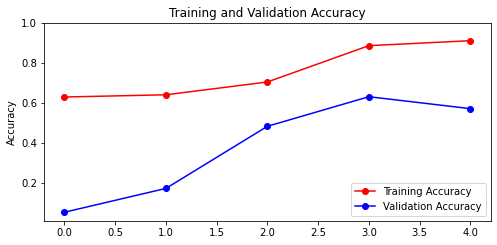

In [14]:
acc = history_2.history['sparse_categorical_accuracy']
val_acc = history_2.history['val_sparse_categorical_accuracy']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', marker='o', color="red")
plt.plot(val_acc, label='Validation Accuracy', marker='o', color="blue",)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy');

## Model 3

In [15]:
vgg16 = tf.keras.applications.vgg16.VGG16()
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model_3 = Sequential()
for layer in vgg16.layers[:-1]:
    model_3.add(layer)
    
model_3.add(Dense(units = 9, activation = 'softmax'))

In [17]:
model_3.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [18]:
history_3 = model_3.fit(train_images,
                              epochs=2,
                              steps_per_epoch=len(train_images),
                              validation_data=valid_images)

Epoch 1/2
189/189 [==============================] - 508s 3s/step - loss: 3.1478 - sparse_categorical_accuracy: 0.8251 - val_loss: 29.1133 - val_sparse_categorical_accuracy: 0.0852
Epoch 2/2
189/189 [==============================] - 508s 3s/step - loss: 3.4442 - sparse_categorical_accuracy: 0.7181 - val_loss: 5.0967 - val_sparse_categorical_accuracy: 0.0852


In [20]:
loss_3, test_accuracy_3= model_3.evaluate(test_images)

print(f'The loss on the test set is {(loss_3):,.3f}')
print(f'The accuracy on the test set: {(test_accuracy_3):.3%}')

94/94 [==============================] - 46s 488ms/step - loss: 5.0960 - sparse_categorical_accuracy: 0.0854
The loss on the test set is 5.096
The accuracy on the test set: 8.538%


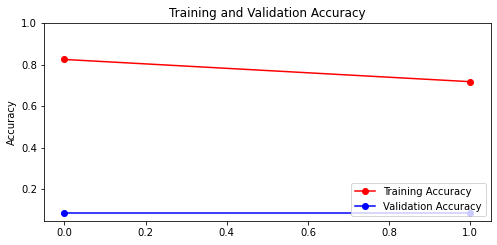

In [21]:
acc = history_3.history['sparse_categorical_accuracy']
val_acc = history_3.history['val_sparse_categorical_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', marker='o', color="red")
plt.plot(val_acc, label='Validation Accuracy', marker='o', color="blue",)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy');

## Conclusion/ Next Steps

Given the results above, model one performed the best with a test accuracy of over 96%. Having three convolutional layers, three max pooling layers, one flatten layer, and two dense layers with the various parameters gave optimal results. Adjustments to the optimzer such as the learning rate and metrics for loss and accuracy could be tuned to find better results on the models. The next steps would be to continue to fine tune and adjust model one. The other two models are largely unreliable and need to be tuned and overhauled to provide higher quality results.